#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

# 2장 선형방정식

## 2.1 행렬의 랭크 구하기

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
A = np.array([[1, 1, 1],
              [1, 1, 10],
              [1, 1, 15]])

# 행렬의 랭크를 반환합니다.
np.linalg.matrix_rank(A)

2

## 2.2 행렬공간

In [2]:
## import libraries for the entire chapter
import numpy as np
from scipy.linalg import null_space

In [3]:
A=np.array([[1,2,2,2],[2,4,6,8],[3,6,8,10]])
print(np.linalg.matrix_rank(A))
# the null space
null_space(A)

2


array([[ 0.66087158, -0.62516795],
       [ 0.00518954,  0.55706184],
       [-0.67125067, -0.48895574],
       [ 0.33562533,  0.24447787]])

In [4]:
A = np.random.randn(3,4)
print(np.linalg.matrix_rank(A))
# the null space
null_space(A)

3


array([[ 0.41964392],
       [-0.64704234],
       [-0.14949548],
       [ 0.61877807]])

In [5]:
np.linalg.norm(null_space(A),axis=0)

array([1.])

In [6]:
np.dot(A,null_space(A))

array([[0.00000000e+00],
       [1.66533454e-16],
       [1.11022302e-16]])

In [7]:
??null_space

In [8]:
# a reduced-rank matrix
A = np.random.randn(16,9) @ np.random.randn(9,11)
A = np.dot(np.random.randn(16,9) , np.random.randn(9,11))
# null spaces
A_n = null_space(A)
A_ln = null_space(A.T)
r  = np.linalg.matrix_rank(A)
print(r)
# dimensionalities
print(A_n.shape[1]+r)
print(A_ln.shape[1]+r)

9
11
16


## 2.3 행렬식(determinant)과 norm 계산하기

In [9]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# 행렬을 만듭니다.
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

# 행렬의 행렬식을 반환합니다.
linalg.det(A)

-25.000000000000004

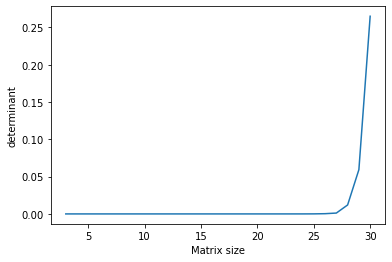

In [10]:
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
    for i in range(iters):
        
        # step 1
        M = np.random.randn(ns[ni],ns[ni])
        
        # step 2
        M[:,0] = M[:,1]
        
        # step 3
        dets[ni,i]=np.abs(np.linalg.det(M))
        

# plotting
plt.plot(ns,np.mean(dets,axis=1))
plt.xlabel('Matrix size')
plt.ylabel('determinant')
plt.show()

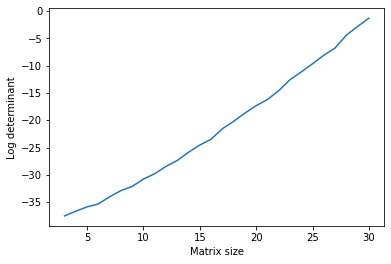

In [11]:
plt.plot(ns,np.log(np.mean(dets,axis=1)))
plt.xlabel('Matrix size')
plt.ylabel('Log determinant')
plt.show()

In [12]:
dets.mean(axis=1)

array([5.16883714e-17, 1.22947553e-16, 2.70490202e-16, 4.63547411e-16,
       1.71006715e-15, 5.28491467e-15, 1.13563901e-14, 4.39297931e-14,
       1.16720992e-13, 4.45451217e-13, 1.31376075e-12, 5.97051800e-12,
       2.21552918e-11, 6.41861399e-11, 4.38255837e-10, 1.68498563e-09,
       7.66334547e-09, 3.00652409e-08, 9.20667892e-08, 4.66347563e-07,
       3.43853206e-06, 1.43339936e-05, 6.38634723e-05, 3.05049961e-04,
       1.14828465e-03, 1.20023524e-02, 5.93226948e-02, 2.65081088e-01])

In [13]:
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [14]:
linalg.norm(A)

11.916375287812984

In [15]:
linalg.norm(A,'fro') # frobenius norm is the default

11.916375287812984

In [16]:
linalg.norm(A,axis=0)

array([3.        , 6.55743852, 9.48683298])

In [17]:
linalg.norm(A,1) # L1 norm (max column sum)

14.0

In [18]:
linalg.norm(A,-1) # min column sum

5.0

In [19]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

13.0

##  2.4 선형방정식과 LU 분해

In [20]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy.linalg import lu

A = np.array([[1,3,5],[2,5,1],[2,3,8]])     


In [21]:
# LU 분해합니다.
P, L, U = lu(A)

print(P)
print(L),
print(U)

np.allclose(A - P @ L @ U, np.zeros((3, 3)))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.    0.    0.  ]
 [ 1.    1.    0.  ]
 [ 0.5  -0.25  1.  ]]
[[ 2.    5.    1.  ]
 [ 0.   -2.    7.  ]
 [ 0.    0.    6.25]]


True

In [22]:
b = np.array([[10], [8], [3]])
y=np.linalg.solve(L, P.T@ b)
y

array([[ 8.  ],
       [-5.  ],
       [ 4.75]])

In [23]:
x=np.linalg.solve(U, y)
x

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [24]:
np.linalg.solve(A,b)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

## 2.5 역행렬 구하기, 연립방정식 풀기

In [25]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [26]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [27]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16, -6.24500451e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [28]:
# 행렬과 역행렬을 곱합니다.
A @ linalg.inv(A)

array([[ 1.00000000e+00, -1.11022302e-16, -6.24500451e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [29]:
b = np.array([[10], [8], [3]])
b

array([[10],
       [ 8],
       [ 3]])

In [30]:
linalg.inv(A).dot(b)  # slow

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [31]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

In [32]:
np.linalg.solve(A, b)  # fast

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [33]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])